## Observations and Insights 

In [26]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import sys as st
import numpy as np
 
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Study data files
testmouse_metadata_path = "data/Mouse_metadata.csv"
mousestudy_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
testmouse_metadata = pd.read_csv(mouse_metadata_path)
mousestudy_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_results = pd.merge(testmouse_metadata, mousestudy_results, on = "Mouse ID")
combined_results

#Display the data table for preview
drugs_grouped = combined_results.groupby(["Drug Regimen"])
drugs_group_mean = round(drugs_grouped["Tumor Volume (mm3)"].mean(),2)
drugs_group_median = round(drugs_grouped["Tumor Volume (mm3)"].median(),2)
drugs_group_var = round(drugs_grouped["Tumor Volume (mm3)"].var(),2)
drugs_group_std = round(drugs_grouped["Tumor Volume (mm3)"].std(),2)
drugs_group_sem = round(drugs_grouped["Tumor Volume (mm3)"].sem(),2)
drugsummary_stats_df = pd.DataFrame({"Mean Volume":drugs_group_mean,
                                 "Median Volume":drugs_group_median,
                                 "Variance":drugs_group_var,
                                 "Standard Deviation":drugs_group_std,
                                 "Standard Error of Measurment":drugs_group_sem})
drugsummary_stats_df

,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error of Measurment
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [27]:
#Checking the number of mice.
testmouse_metadata["Mouse ID"].count()

249

In [28]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_results['Mouse ID'].value_counts().head(25)

g989    13
o562    10
g570    10
r811    10
t724    10
i177    10
e227    10
e476    10
g497    10
b742    10
q787    10
p438    10
a644    10
l733    10
x581    10
g316    10
x402    10
b559    10
c758    10
w350    10
k862    10
a685    10
s565    10
o331    10
v923    10
Name: Mouse ID, dtype: int64

In [29]:
#Optional: Get all the data for the duplicate mouse ID. 
mousestudy_results = study_results.set_index("Mouse ID")

In [30]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_results_droppedIndexData = mousestudy_results.loc['g989', :]
mousestudy_results_droppedIndexData.head(25)

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
g989,0,45.000000,0
g989,0,45.000000,0
g989,5,48.786801,0
g989,5,47.570392,0
g989,10,51.745156,0
g989,10,49.880528,0
g989,15,51.325852,1
g989,15,53.442020,0
g989,20,55.326122,1


In [31]:
#Checking the number of mice in the clean DataFrame.
mousestudy_results = study_results.reset_index()
mousestudy_results['Mouse ID'].value_counts().head(25)

g989    13
o562    10
g570    10
r811    10
t724    10
i177    10
e227    10
e476    10
g497    10
b742    10
q787    10
p438    10
a644    10
l733    10
x581    10
g316    10
x402    10
b559    10
c758    10
w350    10
k862    10
a685    10
s565    10
o331    10
v923    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [32]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#This method is the most straighforward, creating multiple series and putting them all together at the end.
combined_micestudy_results = pd.merge(testmouse_metadata, mousestudy_results, on="Mouse ID")
combined_micestudy_results.head(10)


testmice_grouped = combined_micestudy_results.groupby("Drug Regimen")
testmice_statistics_table = testmice_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

testmice_statistics_table = testmice_statistics_table.rename(columns={"mean":"Mean",
                                                              "Median":"Median",
                                                              "var":"Variance",
                                                              "std" : "Standard Deviation",
                                                              "sem" : "SEM"})

testmice_statistics_table


,Mean,median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#This method produces everything in a single groupby function
namemice_grouped_timepoint =testmice_grouped["Timepoint"].value_counts()

## Bar and Pie Charts

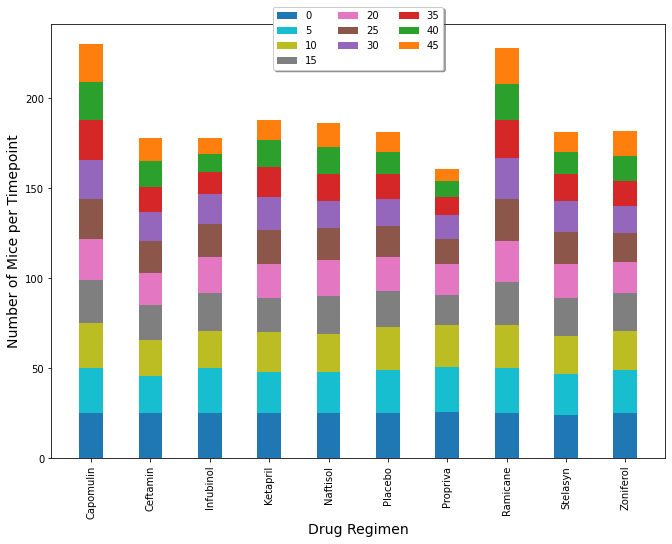

In [41]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Unique_drugsRegimen_values = combined_micestudy_results["Drug Regimen"].unique() 
Unique_drugsRegimen_values = sorted(Unique_drugsRegimen_values)
Unique_Timepoint_values = combined_micestudy_results["Timepoint"].unique() 
testmice_grouped_timepoint = combined_micestudy_results.groupby(["Timepoint"])

# to get mice count for each timepoint grouped by sorted drug name
testmice_grouped_drugsregimen =testmice_grouped_timepoint["Drug Regimen"].value_counts().sort_index().to_list()

counter = 0
combined_micecount_list = []
x_axis = np.arange(len(Unique_drugsRegimen_values))

for i in range(len(Unique_drugsRegimen_values)): 
    micecount_pertimepoint_list = []
    for j in range(len(Unique_Timepoint_values)): 
        
        micecount_pertimepoint_list.append(testmice_grouped_drugsregimen[counter])
        counter = counter + 1
    
    combined_micecount_list.append(micecount_pertimepoint_list)

data = np.array(combined_micecount_list)

#colors used for each timepoint bar 
color_list = ['C10', 'C9', 'C8', 'C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']
fig = plt.gcf()
fig.set_size_inches(11, 8)
width = 0.4

#loop for each timepoint to create stacked bar plot
X = np.arange(data.shape[1])
for i in range(data.shape[0]):  
  plt.bar(X, data[i],width, bottom = np.sum(data[:i], axis = 0), color = color_list[i % len(color_list)])

plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Mice per Timepoint', fontsize=14)
plt.xticks(X, Unique_drugsRegimen_values,rotation=90)
plt.legend(Unique_Timepoint_values,loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.show()


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
